Import Library

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore")
from joblib import dump, load

## Reading the Data

In [158]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


## Check and Delete the Duplicate

In [159]:
df.duplicated().sum()

671

In [160]:
df0 = df.drop_duplicates()

## Data To Be Used for Modelling

#### we assume that marital status has no correlation with our Label

In [161]:
df3 = df0[['Tenure','WarehouseToHome','NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','Complain','DaySinceLastOrder','CashbackAmount','Churn']]

In [162]:
df3.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,0,8.0,322.17,0


## Data Processing

#### PreferedOrderCat will be proceed with dummy variable, because we assume that every data contain has no either degree or correlation between one and another
#### Cashback Amount will be proceed using Standard Scaler, because there are outliers exist in the data

In [163]:
df4 = pd.get_dummies(df3)
df4.reset_index(drop = True, inplace = True)
df4


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,15.0,29.0,4,3,0,7.0,143.32,0,0,0,1,0,0,0
1,7.0,25.0,4,1,0,7.0,129.29,0,0,0,0,1,0,0
2,27.0,13.0,3,1,0,7.0,168.54,0,0,0,1,0,0,0
3,20.0,25.0,4,3,0,NaN,230.27,0,1,0,0,0,0,0
4,30.0,15.0,4,4,0,8.0,322.17,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5,4,0,8.0,249.90,0,1,0,0,0,0,0
3266,26.0,7.0,4,1,0,9.0,295.99,0,0,1,0,0,0,0
3267,28.0,9.0,5,3,0,1.0,231.86,0,1,0,0,0,0,0
3268,8.0,7.0,2,2,0,4.0,157.80,0,0,0,0,0,1,0


## inputation for missing value

In [164]:
impute = IterativeImputer()
array = impute.fit_transform(df4)
df5 = pd.DataFrame(data = array, columns=['Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','Complain','DaySinceLastOrder','CashbackAmount','Churn','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery','PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile Phone','PreferedOrderCat_Others'])
df5

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,15.0,29.0,4.0,3.0,0.0,7.000000,143.32,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,7.0,25.0,4.0,1.0,0.0,7.000000,129.29,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,27.0,13.0,3.0,1.0,0.0,7.000000,168.54,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,20.0,25.0,4.0,3.0,0.0,6.750037,230.27,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,30.0,15.0,4.0,4.0,0.0,8.000000,322.17,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,25.0,15.0,5.0,4.0,0.0,8.000000,249.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3266,26.0,7.0,4.0,1.0,0.0,9.000000,295.99,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3267,28.0,9.0,5.0,3.0,0.0,1.000000,231.86,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3268,8.0,7.0,2.0,2.0,0.0,4.000000,157.80,0.0,0.0,0.0,0.0,0.0,1.0,0.0


EDA

<AxesSubplot:xlabel='CashbackAmount'>

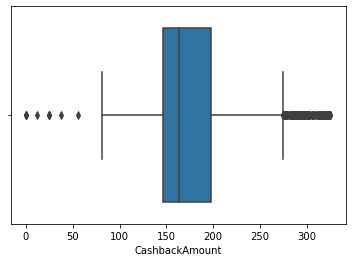

In [165]:
sns.boxplot(df5['CashbackAmount'])

In [166]:
df5_dummy_train, df5_dummy_test = train_test_split(df5, test_size=0.30, random_state=36, stratify = df5['Churn'])

In [167]:
std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(df5_dummy_train[['CashbackAmount']])
xtrain_prepared = pd.DataFrame(data =x_train, columns=['CashbackAmountScaled'])
df5_dummy_train.reset_index(drop = True, inplace = True)
xtrain_prepared.reset_index(drop = True,inplace = True)
data_train = pd.concat([df5_dummy_train,xtrain_prepared],axis = 1)
data_train

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,CashbackAmountScaled
0,1.000000,14.0,4.0,4.0,1.0,1.0,149.72,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.560069
1,4.000000,9.0,5.0,1.0,0.0,3.0,152.20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.510196
2,4.000000,34.0,4.0,2.0,0.0,8.0,178.04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.009442
3,0.000000,12.0,3.0,3.0,0.0,2.0,127.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.002285
4,1.000000,10.0,2.0,2.0,0.0,8.0,169.20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.168329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,7.000000,10.0,4.0,4.0,1.0,4.0,147.77,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.599283
2285,1.000000,9.0,4.0,4.0,0.0,1.0,138.93,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.777054
2286,8.802753,11.0,1.0,3.0,1.0,3.0,121.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.132194
2287,8.000000,17.0,4.0,3.0,1.0,1.0,163.15,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.289993


In [168]:
std_scaler = StandardScaler()
x_test = std_scaler.fit_transform(df5_dummy_test[['CashbackAmount']])
xtest_prepared = pd.DataFrame(data =x_test, columns=['CashbackAmountScaled'])
df5_dummy_test.reset_index(drop = True, inplace = True)
xtest_prepared.reset_index(drop = True,inplace = True)
data_test = pd.concat([df5_dummy_test,xtest_prepared],axis = 1)
data_test

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,CashbackAmountScaled
0,9.0,24.000000,4.0,5.0,1.0,6.003518,214.66,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.778476
1,7.0,15.663987,3.0,5.0,0.0,2.000000,123.62,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.106487
2,31.0,10.000000,5.0,2.0,0.0,1.000000,146.77,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.627172
3,3.0,15.000000,5.0,2.0,1.0,3.000000,175.56,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.031081
4,10.0,6.000000,3.0,2.0,0.0,2.000000,174.91,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.044539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,2.0,14.000000,4.0,1.0,1.0,2.000000,150.56,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.548701
977,1.0,30.000000,4.0,5.0,1.0,6.052836,224.50,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.982211
978,14.0,18.000000,3.0,2.0,1.0,0.000000,147.66,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.608744
979,24.0,14.000000,4.0,4.0,0.0,6.670089,224.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.990493


## Feature Selection : Avoid Multicollinearity between Variables

saat melakukan model, kita asumsikan bahwa semua kolom yang ada pada dataset kita adalah fitur yang memiliki korelasi terhadap label yang akan kita prediksi. Kemudian, kita melakukan pengecekan terhadap multicollinearity yang akan berpengaruh buruk pada model yang dihasilkan. Setelah itu, kita melakukan pengecekan terhadap accuracy yang dihasilkan oleh model. Jika accuracy yang dihasilkan buruk, terjadi overfitting dan underfitting, maka kita akan melakukan feature selection lebih dalam lagi, Jika dengan fitur (setelah pengecekan multicollinearity) yang ada sudah dapat menghasilkan model dengan accuracy yang baik, maka penghapusan fitur diasumsikan tidak perlu dilakukan. Ditetapkan bahwa fitur hasil pengecekan dari multicollinearity adalah fitur dengan nilai kurang dari 8.

In [169]:
def calculation_vif(X):
    vif = pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [170]:
calculation_vif(data_train[['Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','Complain',
'DaySinceLastOrder','CashbackAmountScaled','Churn','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery',
'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile Phone','PreferedOrderCat_Others']])

,variables,VIF
0,Tenure,1.564724
1,WarehouseToHome,1.024041
2,NumberOfDeviceRegistered,1.171234
3,SatisfactionScore,1.016087
4,Complain,1.085403
5,DaySinceLastOrder,1.181276
6,CashbackAmountScaled,7.698071
7,Churn,1.310833
8,PreferedOrderCat_Fashion,5.665511
9,PreferedOrderCat_Grocery,4.553510


In [171]:
label = ['Churn']
feature = ['Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','Complain',
'DaySinceLastOrder','CashbackAmountScaled','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery'
,'PreferedOrderCat_Mobile','PreferedOrderCat_Others']

## Model Training using several Model

In [172]:
xtrain_final = data_train[feature]
xtest_final = data_test[feature]
ytrain_final = data_train[label]
ytest_final = data_test[label]

#### Def for Classification Evaluation Method

In [173]:
def confusion_matrix_display(y_true, y_pred):
    print(f'Balanced accuracy score: {balanced_accuracy_score(y_true, y_pred)}')

    print(classification_report(y_true, y_pred))

    ax = plt.subplot()
    
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g')

  
    ax.set_title('Confusion matrix')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    plt.show()

### K-Nearest Neighbour

In [174]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=5, )
knn.fit(xtrain_final,ytrain_final)

KNeighborsRegressor()

In [175]:
r2_train = knn.score(xtrain_final,ytrain_final)
r2_test =  knn.score(xtest_final,ytest_final)
print(r2_train)
print(r2_test)

0.5782571592130799
0.3912064555420217


#### Hyperparameter Tuning : Number of n_neighnors

In [176]:
rangeK =range(3,19,2)

for k in rangeK:
    knn = KNeighborsRegressor(n_neighbors= k)
    knn.fit(xtrain_final,ytrain_final)
    r2Train = knn.score(xtrain_final,ytrain_final)
    r2Test = knn.score(xtest_final,ytest_final)
    print('hasil pada iterasi untuk Train dengan n_neighbors {} ialah {}'.format(k,r2Train))
    print('hasil pada iterasi untuk Test dengan n_neighbors {} ialah {}'.format(k,r2Test))
    


hasil pada iterasi untuk Train dengan n_neighbors 3 ialah 0.6956707297207988
hasil pada iterasi untuk Test dengan n_neighbors 3 ialah 0.3378349573690619
hasil pada iterasi untuk Train dengan n_neighbors 5 ialah 0.5782571592130799
hasil pada iterasi untuk Test dengan n_neighbors 5 ialah 0.3912064555420217
hasil pada iterasi untuk Train dengan n_neighbors 7 ialah 0.5148617624120619
hasil pada iterasi untuk Test dengan n_neighbors 7 ialah 0.3871645765492553
hasil pada iterasi untuk Train dengan n_neighbors 9 ialah 0.4737664361838835
hasil pada iterasi untuk Test dengan n_neighbors 9 ialah 0.3714871768845579
hasil pada iterasi untuk Train dengan n_neighbors 11 ialah 0.45377625404433186
hasil pada iterasi untuk Test dengan n_neighbors 11 ialah 0.36274895310093513
hasil pada iterasi untuk Train dengan n_neighbors 13 ialah 0.43179458208226085
hasil pada iterasi untuk Test dengan n_neighbors 13 ialah 0.35478899847926815
hasil pada iterasi untuk Train dengan n_neighbors 15 ialah 0.4191252658670

#### Final Model untuk KNN : knn = KNeighborsRegressor(n_neighbors=11), dengan accuracy untuk Training Dataset : 0.45 dan untuk Test Set : 0.3627

### Logistic Regression

In [177]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(xtrain_final, ytrain_final)

LogisticRegression()

### counting accuracy for test set dan train set

In [178]:
logReg.score(xtrain_final, ytrain_final)

0.8807339449541285

In [179]:
logReg.score(xtest_final, ytest_final)

0.8899082568807339

## Hyperparameter Tuning : MaxIter

In [180]:
rangeMaxIter =range(100, 700, 100)

for k in rangeMaxIter:
    logReg = LogisticRegression(max_iter= k)
    logReg.fit(xtrain_final,ytrain_final)
    r2TrainReg = logReg.score(xtrain_final,ytrain_final)
    r2TestReg = logReg.score(xtest_final,ytest_final)
    print('hasil pada Train set dengan maxIter {} ialah {}'.format(k,r2TrainReg))
    print('hasil pada Test set dengan maxIter {} ialah {}'.format(k,r2TestReg))
    


hasil pada Train set dengan maxIter 100 ialah 0.8807339449541285
hasil pada Test set dengan maxIter 100 ialah 0.8899082568807339
hasil pada Train set dengan maxIter 200 ialah 0.8807339449541285
hasil pada Test set dengan maxIter 200 ialah 0.8899082568807339
hasil pada Train set dengan maxIter 300 ialah 0.8807339449541285
hasil pada Test set dengan maxIter 300 ialah 0.8899082568807339
hasil pada Train set dengan maxIter 400 ialah 0.8807339449541285
hasil pada Test set dengan maxIter 400 ialah 0.8899082568807339
hasil pada Train set dengan maxIter 500 ialah 0.8807339449541285
hasil pada Test set dengan maxIter 500 ialah 0.8899082568807339
hasil pada Train set dengan maxIter 600 ialah 0.8807339449541285
hasil pada Test set dengan maxIter 600 ialah 0.8899082568807339


## Evaluation Method

Balanced accuracy score: 0.7028022507365158
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      1915
         1.0       0.72      0.44      0.55       374

    accuracy                           0.88      2289
   macro avg       0.81      0.70      0.74      2289
weighted avg       0.87      0.88      0.87      2289



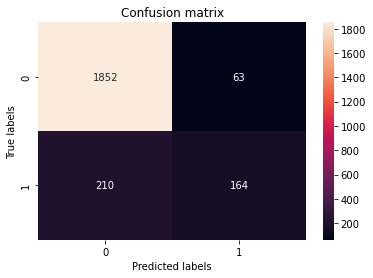

In [181]:
confusion_matrix_display(ytrain_final, logReg.predict(xtrain_final))

#### Dapat dilihat bahwa hasil score dari logistic regression pada Hyperparameter Tuning menghasilkan hasil yang relative konsisten, dan dapat dilihat dari confusion matrix pada train set bahwa accuracy yang dihasilkan ialah berdasarkan Ratio antara jumlah True Positif dan True Negatif dengan keseluruhan jumlah data yang ada. Pada Classification Model, kita dapat membandingkan accuracy yang akurat pada beberapa percobaan algoritma dengan confusin matrix secara general. Oleh karena itu, saya menggunakan Confusin Matrix untuk melakukan perbandingan perbandingan pada model yang saya coba setelah ini

### Decision Tree Classifier

In [182]:
dt = DecisionTreeClassifier(random_state = 36, max_depth=12)
dt.fit(xtrain_final,ytrain_final)
print(dt.score(xtrain_final, ytrain_final))
print(dt.score(xtest_final, ytest_final))
print(dt.score())

0.9882044560943644
0.8868501529051988


TypeError: score() missing 2 required positional arguments: 'X' and 'y'

## Hyperparameter Tuning

In [ ]:
rangeX =range(3,12,3)

for x in rangeX:
    DecTree = DecisionTreeClassifier(max_depth = x)
    DecTree.fit(xtrain_final,ytrain_final)
    r2TrainDecTree = DecTree.score(xtrain_final,ytrain_final)
    r2TestDecTree = DecTree.score(xtest_final,ytest_final)
    print('hasil pada iterasi untuk Train dengan max depth {} ialah {}'.format(x,r2TrainDecTree))
    print('hasil pada iterasi untuk Test dengan max depth {} ialah {}'.format(x,r2TestDecTree))
    


hasil pada iterasi untuk Train dengan max depth 3 ialah 0.8885976408912188
hasil pada iterasi untuk Test dengan max depth 3 ialah 0.8929663608562691
hasil pada iterasi untuk Train dengan max depth 6 ialah 0.9086937527304499
hasil pada iterasi untuk Test dengan max depth 6 ialah 0.8868501529051988
hasil pada iterasi untuk Train dengan max depth 9 ialah 0.9467016164263871
hasil pada iterasi untuk Test dengan max depth 9 ialah 0.8848114169215087


#### gunakan maxdepth = 3

#### Evaluation Method

Balanced accuracy score: 0.8659450440513257
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1915
         1.0       0.91      0.75      0.82       374

    accuracy                           0.95      2289
   macro avg       0.93      0.87      0.89      2289
weighted avg       0.95      0.95      0.94      2289



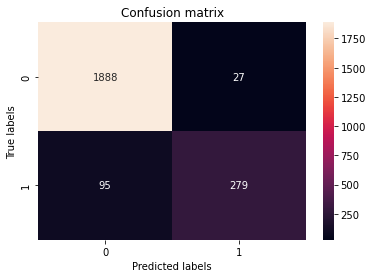

In [ ]:
confusion_matrix_display(ytrain_final, DecTree.predict(xtrain_final))

#### Accuracy dan Scoring pada decesion tree menghasilkan angka yang lebih baik dibandingkan dengan KNN dan Log. Reg, sehingga model ini akan digunakan sebagai model final. Setelah ini, saya melakukan validation untuk melihat konsistensi model.

## CrossValidation

In [ ]:
data_test_DecTree,data_test_Validation = train_test_split(data_test, test_size=0.50, random_state=55, stratify = df5_dummy_test['Churn'])

In [ ]:
xtest_decTree = data_test_DecTree[feature]
xVal_DecTree = data_test_Validation[feature]
ytest_decTree = data_test_DecTree[label]
yVal_DecTree = data_test_Validation[label]

In [ ]:

dt.fit(xtrain_final, ytrain_final)
dt.score(xtrain_final, ytrain_final)

0.8885976408912188

Balanced accuracy score: 0.8659450440513257
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1915
         1.0       0.91      0.75      0.82       374

    accuracy                           0.95      2289
   macro avg       0.93      0.87      0.89      2289
weighted avg       0.95      0.95      0.94      2289



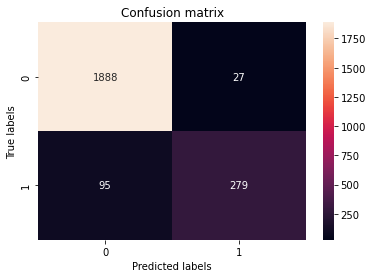

In [ ]:
confusion_matrix_display(ytrain_final, DecTree.predict(xtrain_final))

In [ ]:

dt.fit(xVal_DecTree, yVal_DecTree)
dt.score(xVal_DecTree, yVal_DecTree)

0.9185336048879837

Balanced accuracy score: 0.7916514598540146
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       411
         1.0       0.80      0.61      0.70        80

    accuracy                           0.91       491
   macro avg       0.87      0.79      0.82       491
weighted avg       0.91      0.91      0.91       491



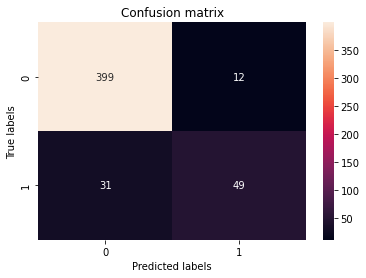

In [ ]:
confusion_matrix_display(yVal_DecTree, DecTree.predict(xVal_DecTree))

In [ ]:

dt.fit(xtest_decTree, ytest_decTree)
dt.score(xtest_decTree, ytest_decTree)

0.889795918367347

Balanced accuracy score: 0.7033536585365854
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       410
         1.0       0.58      0.47      0.52        80

    accuracy                           0.86       490
   macro avg       0.74      0.70      0.72       490
weighted avg       0.85      0.86      0.85       490



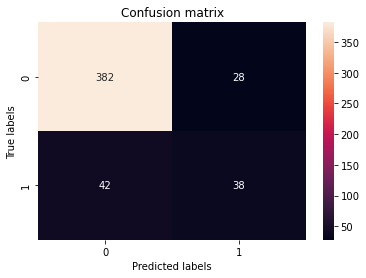

In [ ]:
confusion_matrix_display(ytest_decTree, DecTree.predict(xtest_decTree))

Dapat dilihat bahwa hasil scoring pada train set, validation set dan test set menghasilkan angka yang tidak berbeda signifikan, sehingga model ini dapat digunakan sebagai final model